<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_DSDO/blob/main/Big_data_analytics_project/Data_cleaning_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data checking & Data cleaning

Upload data into Google Cloud

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv


Load the data into dataframe using Pandas

In [ ]:
import pandas as pd
df = pd.read_csv('AirQualityUCI.csv')
df.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


Here we found the data look weird. Then we follow the investigation. We check the shape of the dataframe and the column list.

In [ ]:
df.shape

(9471, 1)

Now we found the problem. This csv file is with delimiter and cannot be read properly if we do not define the delimiter. So, we need to go back to the first step and read the data again, but this time we define the delimiter (in this case the delimiter is ";").

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', delimiter= ';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


Cool! Now the data looks good. We need further check to see how we should clean the data. First we check the data types and understand whether they are all in right format.

In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

By checking the data types, we found that there are lots of air quality index columns, such as CO(GT), are all object format and not numeric. By looking at the data more carefully, we found that the decimal is not in the right format. They use "," instead of "." so it could be recognised as number. So the easy way is to replace "," with "." And then change the data type to "float". Here we use two methods to help us:



```
df.replace() # we need to make sure the column is string, so we use df[col].str.replace()
df.astype(float) # we use .astype to set up the right data format for the column
```

To do it more efficiently (instead of doing column by column manually), we can use for loop by checking all these columns and replace for all. Here we use the following syntax to help us find out all object_columns:



```
df.dtypes['df.dtypes == 'object'].index.values.tolist()
# so first we find out all columns which are in object format,
# and then we return the index value which is the column name,
# and convert the column names into list.

# if you also want to find out the numeric columns, use similar method
numeric_columns=df.dtypes[df.dtypes == "float64"].index.values.tolist()
```


In [ ]:
object_columns = df.dtypes[df.dtypes == "object"].index.values.tolist()
object_columns

['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

We listed all object columns, but the list also includes "Date" and "Time" columns. So, we will use object_columns[2:] to exclude the first two columns in the list.



In [ ]:
object_columns[2:]

['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

The following codes show how we loop each problematic index column and replace "," with "." and change the format to float.

In [ ]:
for col in object_columns[2:]:
  df[col] = df[col].str.replace(',','.').astype(float)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


Double checking the data types, all data formats are correct.

In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

We further check the missing values. It is very common to have missing values in the real-world data. But we cannot just drop easily. We need to understand why there are missing values and how to deal with them.

In [ ]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

By checking this list of missing value counts, we found that there are two columns are complete empty and the column names doesn't make sense at all. Thus, before we use dropna() we need to remove these two columns first. If not, when we use dropna() we will lose all data. And then come back and check other columns. We have 9471 instances, and these columns all have 114 missing values. We can consider fill the missing value, for example using mean/median, but given it is not large number compared to the overall size, we will just drop all missing value.

In [ ]:
df = df.drop(['Unnamed: 15','Unnamed: 16'], axis = 1)
df.dropna(inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Exploratory Data Analysis (EDA)

1. Descriptive Statistics: We can analyse the data by computing descriptive statistics, providing a summary overview of the central tendency, dispersion, and shape of the dataset's distribution. This step helps identify initial patterns, potential outliers, and the general data structure.

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Visualisation is a powerful tool for EDA. We can use it to check distribution, relationship, outliers and etc. The following examples will show different use of visualisation for exploring the data and feature engineering.

2. Distribution Analysis: By examining the distribution of key features, we understand the variability and skewness in different variables.

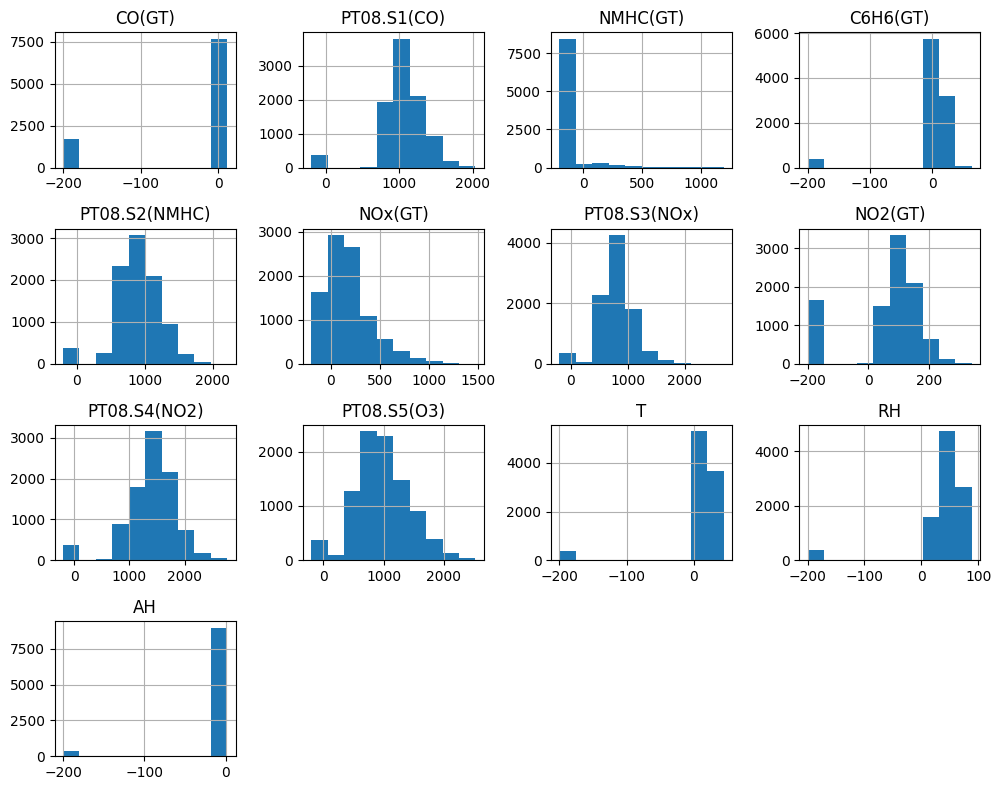

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each column
df.hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
sensor_col = df.columns[df.columns.str.startswith('PT08')].tolist()
air_col = ['T','AH','RH']
Ref_col = df.drop(columns = sensor_col+air_col+['Date']+['Time']).columns.tolist()

3. Time Series Analysis: Given the temporal nature of the dataset, we can explore trends over time. This involves aggregating data at various time intervals—daily, hourly.

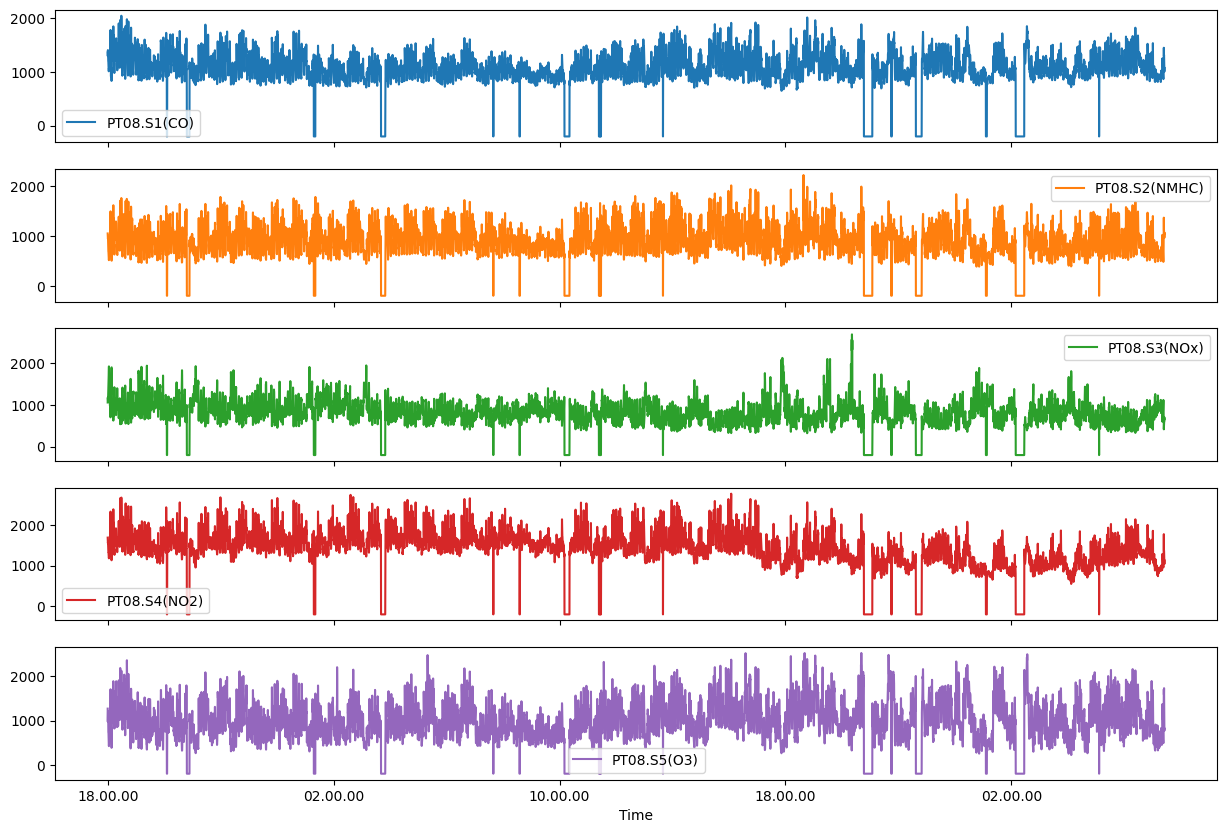

In [ ]:
col = sensor_col+['Date','Time']
axes = df[col].plot.line(x = 'Time',subplots=True, figsize=(15, 10))

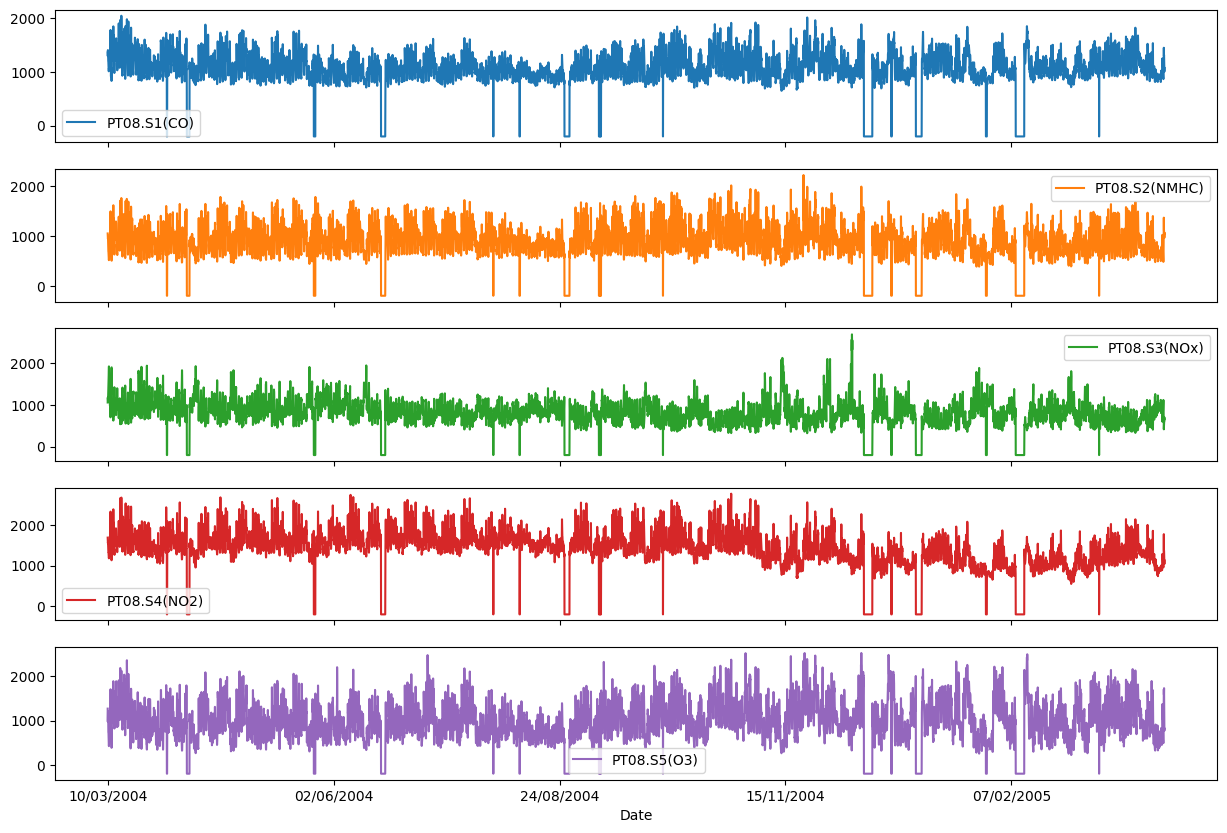

In [ ]:
axes = df[col].plot.line(x = 'Date',subplots=True, figsize=(15, 10))

4. Correlation Analysis: A correlation matrix enables exploring the relationships between different numerical features. This analysis can highlight potential dependencies and associations between attributes, aiding in feature selection and model development. We can also use pairplot to visualise the bivariate relationship.

In [ ]:
numeric_columns=df.dtypes[df.dtypes == "float64"].index.values.tolist()

corr = df[numeric_columns].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.00,0.04,0.13,-0.03,0.03,0.53,-0.09,0.67,-0.07,0.08,-0.07,-0.05,-0.05
PT08.S1(CO),0.04,1.00,0.17,0.85,0.93,0.28,0.09,0.15,0.85,0.89,0.75,0.75,0.76
NMHC(GT),0.13,0.17,1.00,0.04,0.11,-0.00,0.05,0.10,0.16,0.10,-0.00,0.01,0.01
C6H6(GT),-0.03,0.85,0.04,1.00,0.77,-0.00,0.51,-0.01,0.77,0.64,0.97,0.93,0.98
PT08.S2(NMHC),0.03,0.93,0.11,0.77,1.00,0.33,-0.07,0.18,0.87,0.91,0.67,0.59,0.65
NOx(GT),0.53,0.28,-0.00,-0.00,0.33,1.00,-0.44,0.82,0.04,0.46,-0.14,-0.05,-0.10
PT08.S3(NOx),-0.09,0.09,0.05,0.51,-0.07,-0.44,1.00,-0.26,0.12,-0.21,0.59,0.57,0.62
NO2(GT),0.67,0.15,0.10,-0.01,0.18,0.82,-0.26,1.00,-0.02,0.25,-0.08,-0.08,-0.06
PT08.S4(NO2),-0.07,0.85,0.16,0.77,0.87,0.04,0.12,-0.02,1.00,0.72,0.76,0.64,0.69
PT08.S5(O3),0.08,0.89,0.10,0.64,0.91,0.46,-0.21,0.25,0.72,1.00,0.50,0.52,0.52


In [ ]:
corr1 = df[sensor_col].corr()
corr1.style.background_gradient(cmap='coolwarm').format(precision=2)

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3)
PT08.S1(CO),1.00,0.93,0.09,0.85,0.89
PT08.S2(NMHC),0.93,1.00,-0.07,0.87,0.91
PT08.S3(NOx),0.09,-0.07,1.00,0.12,-0.21
PT08.S4(NO2),0.85,0.87,0.12,1.00,0.72
PT08.S5(O3),0.89,0.91,-0.21,0.72,1.00


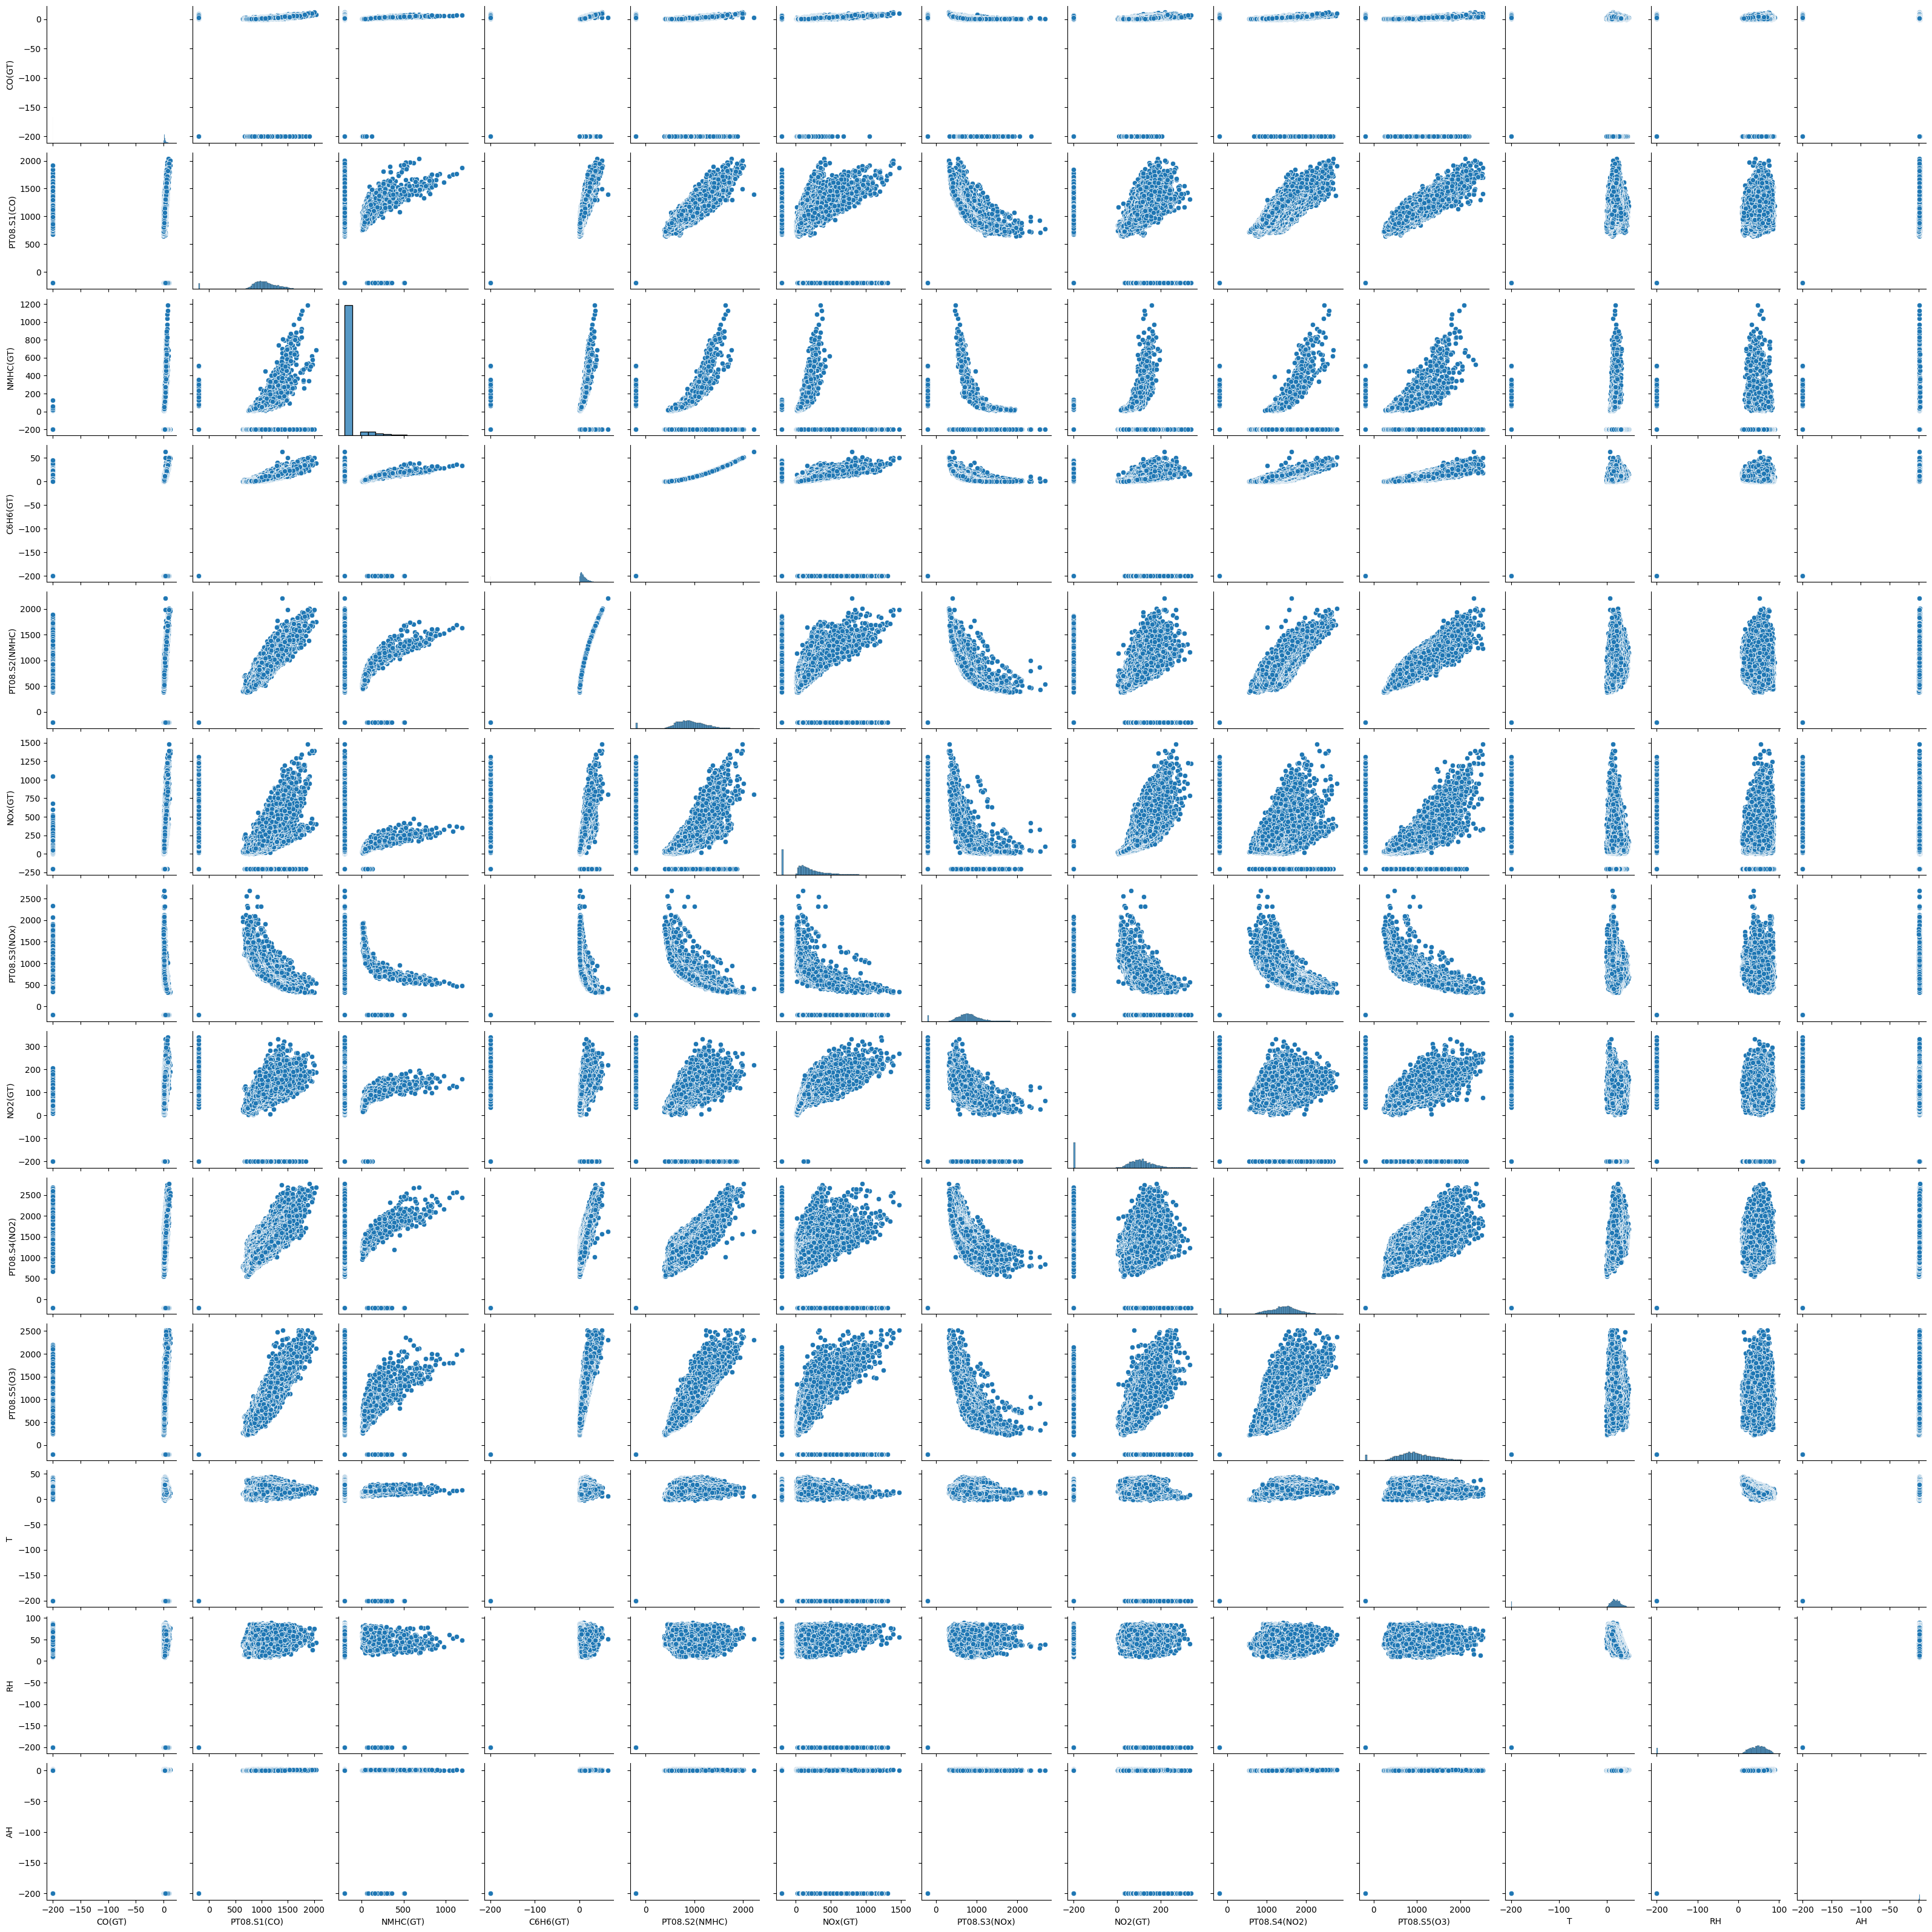

In [ ]:
import seaborn as sns
sns.pairplot(df)

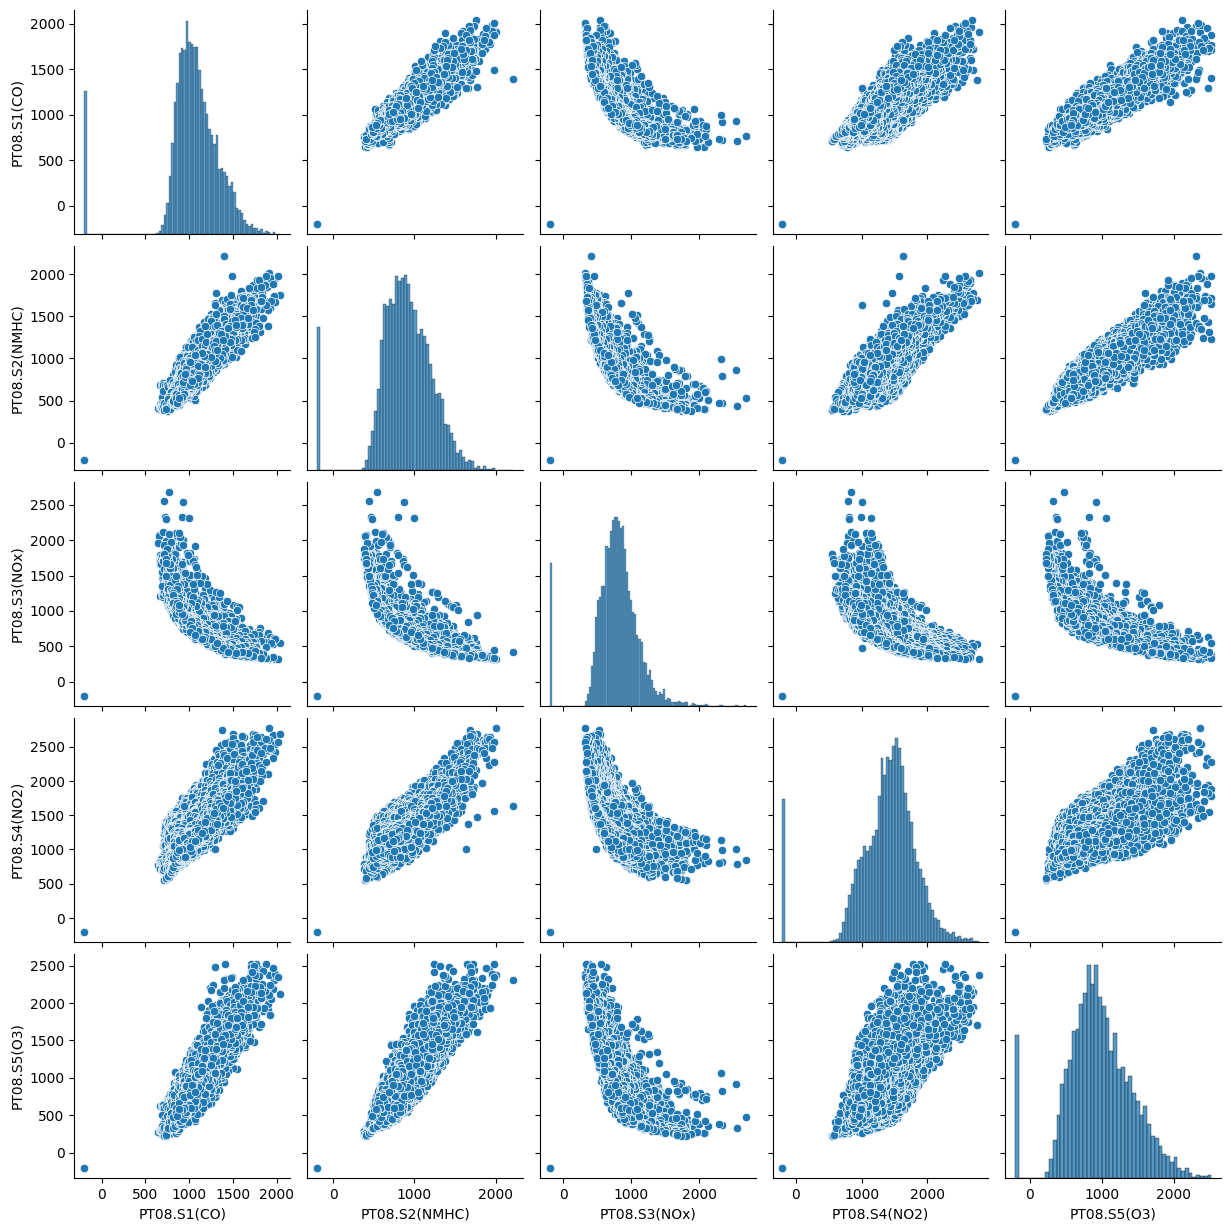

In [ ]:
import seaborn as sns
sns.pairplot(df[sensor_col])